In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
#referenced from function by agoosefromfaraway on github.

def filtroRejeitaNotch(dimencoes, D0, uk, vk):
    X, Y = dimencoes
    filtro = np.zeros((X, Y))

    #percorrer filtro:
    for u in range(X):
        for v in range( Y):
            

            #Checar se distancia entre o ponto atual (u,v) e os pontos denotados por (uk,vk) eh menor que D0:
            Distancia_uv = np.sqrt((u - X / 2 + uk) ** 2 + (v - Y / 2 + vk) ** 2)
            Distancia_muv = np.sqrt((u - X / 2 - uk) ** 2 + (v - Y / 2 - vk) ** 2)
            
            if Distancia_uv <=D0 or Distancia_muv <=D0:
                filtro[u, v] = 0.0
            else:
                filtro[u, v] = 1.0

    return filtro

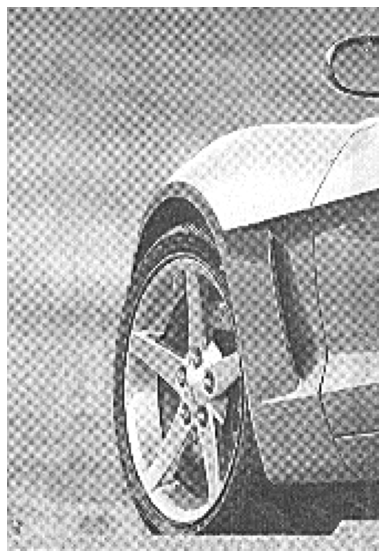

In [3]:
# imagem original:
img = cv2.imread("moire.tif",0)

# mostrar:
plt.figure(figsize=(15,10))
plt.axis("off")
plt.imshow(img,"gray")

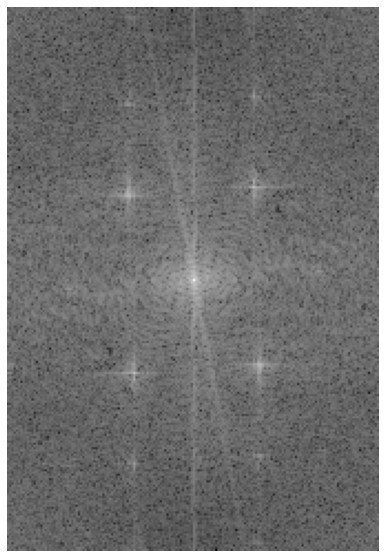

In [4]:
# transformada de fourier discreta:
fourier = np.fft.fft2(img)                      #transformada de forier discreta
fshift = np.fft.fftshift(fourier)               #deslocada ao centro
phase_spectror = np.angle(fourier)
spectro = 50*np.log(np.abs(fshift))

# mostrar:
plt.figure(figsize=(15,10))
plt.axis("off")
plt.imshow(spectro,"gray")

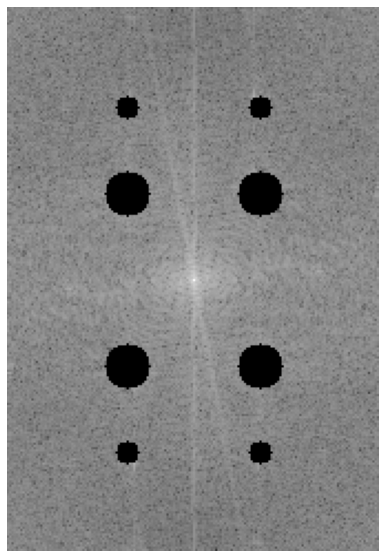

In [5]:
# criar filtro
filtro1 = filtroRejeitaNotch(img.shape, 10, 39, 30) 
filtro2 = filtroRejeitaNotch(img.shape, 10, -39, 30)
filtro3 = filtroRejeitaNotch(img.shape, 5, 78, 30)
filtro4 = filtroRejeitaNotch(img.shape, 5, -78, 30)

filtro = filtro1*filtro2*filtro3*filtro4

#aplicar filtro no spectro para demonstracao:
spectro_filtrado = spectro*filtro

#mostrar
plt.figure(figsize=(15,10))
plt.axis("off")
plt.imshow(spectro_filtrado,"gray")

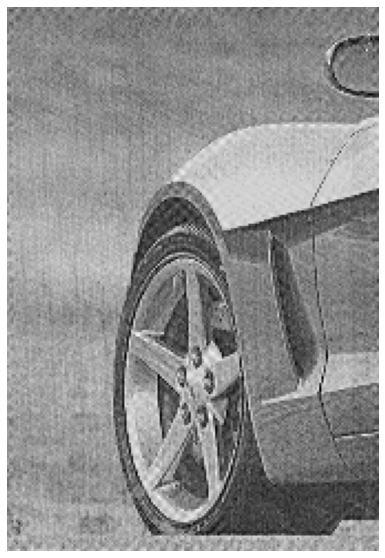

In [6]:
# Aplicar filtro:
fourier_filtrada = fshift * filtro   

# desfaser transformada:
foutier_filtrada_redeslocada = np.fft.ifftshift(fourier_filtrada)  # deslocada do centro
inverse_NotchReject = np.fft.ifft2(foutier_filtrada_redeslocada)   # transformada de forier discreta invertida
resultado3 = np.abs(inverse_NotchReject)                           
 
# mostrar:
plt.figure(figsize=(15,10))
plt.axis("off")
plt.imshow(resultado3,"gray")